In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [25]:
df_bike = pd.read_csv("/kaggle/input/electric-vehicle-2023/ev2_bikewale.csv")

In [26]:
print(df_bike["Used it for"].unique())
print(df_bike["Model Name"].unique())
print(df_bike["Owned for"].unique())
print(df_bike["Ridden for"].unique())
print(df_bike.shape)
df_bike.head()

['Daily Commute' 'Everything' 'Occasional Commute' 'Leisure Rides' 'Tours']
['TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revolt RV 300' 'Hero Electric Photon' 'Okinawa Praise' 'Benling Aura'
 'Ampere Magnus Pro' 'PURE EV EPluto 7G' 'Ampere REO' 'Odysse Evoqis'
 'Hero Electric NYX HX' 'Okinawa i-Praise' 'Joy e-bike Monster'
 'PURE EV ETrance Neo' 'Evolet Polo' 'Okinawa Ridge Plus' 'Ampere Zeal'
 'Hero Electric Atria' 'Okinawa Lite' 'Hero Electric NYX' 'Okinawa R30'
 'Yo Drift' 'BGauss B8' 'Joy e-bike Wolf' 'Gemopai Astrid Lite'
 'Techo Electra Emerge' 'Techo Electra Raptor' 'e-bike Gen Nxt'
 'Gemopai Ryder']
['Never owned' '> 1 yr' '< 3 months' '6 months-1 yr' '3-6 months'
 'Occasional Commute']
[nan '< 5000 kms' '5000-10000 kms' '> 15000 kms' '10000-15000 kms'
 'Never owned']
(844, 14)


,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [27]:
df_bike.rename(columns={"Used it for":"Used"},inplace=True)
from sklearn.preprocessing import LabelEncoder

labe = LabelEncoder()
df_bike['Used'] = labe.fit_transform(df_bike['Used'])
print(df_bike['Used'].unique())
print(labe.inverse_transform(df_bike['Used'].unique()))

[0 1 3 2 4]
['Daily Commute' 'Everything' 'Occasional Commute' 'Leisure Rides' 'Tours']


In [28]:
for i in range(844):
    ride = df_bike.loc[i,"Owned for"]
    if  ride == '> 1 yr':
        df_bike.loc[i,"Owned for"] = 1
    elif  ride == '6 months-1 yr':
        df_bike.loc[i,"Owned for"] = 1
    elif  ride == '3-6 months':
        df_bike.loc[i,"Owned for"] = 6
    elif  ride == '< 3 months':
        df_bike.loc[i,"Owned for"] = 3
    else:
        df_bike.loc[i,"Owned for"] = 0


In [29]:
for i in range(844):
    ride = df_bike.loc[i,"Ridden for"]
    if  ride == '< 5000 kms':
        df_bike.loc[i,"Ridden for"] = 2500
    elif  ride == '5000-10000 kms':
        df_bike.loc[i,"Ridden for"] = 7500
    elif  ride == '10000-15000 kms':
        df_bike.loc[i,"Ridden for"] = 12500
    elif  ride == '> 15000 kms':
        df_bike.loc[i,"Ridden for"] = 17500
    else:
        df_bike.loc[i,"Ridden for"] = 0

In [30]:
df_bike = df_bike.fillna(0)
column_names = ['Used', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal',
       'Reliability', 'Performance', 'Service Experience', 'Extra Features',
       'Comfort', 'Maintenance cost', 'Value for Money']
new_df = df_bike[column_names]
new_df.head()

,Used,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,0,0,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0
1,1,1,2500,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0
2,0,3,2500,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0
3,0,1,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0,1,2500,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0


In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(new_df.values)
standf=scale.transform(new_df.values)
standf=pd.DataFrame(standf,columns = column_names)
print(standf.head())

       Used  Owned for  Ridden for    rating  Visual Appeal  Reliability  \
0 -0.527061  -1.038847   -0.919689 -1.399600      -0.174248     0.631486   
1  0.585038  -0.511615   -0.322139 -1.399600      -0.174248    -0.962653   
2 -0.527061   0.542849   -0.322139 -0.215377       0.389221     0.631486   
3 -0.527061  -0.511615    0.872961 -1.399600      -1.301187    -0.962653   
4 -0.527061  -0.511615   -0.322139 -1.399600      -0.174248     0.631486   

   Performance  Service Experience  Extra Features   Comfort  \
0     -0.72701           -1.379209       -0.448898  0.815282   
1     -0.72701           -0.852727       -0.448898  0.335437   
2     -0.72701           -0.326244       -0.448898  1.295127   
3     -0.72701           -0.852727       -0.448898 -0.624254   
4     -0.72701           -0.852727       -0.448898  0.335437   

   Maintenance cost  Value for Money  
0         -0.472806        -0.285153  
1         -0.472806         0.728191  
2         -0.472806         0.221519  
3 

Text(0, 0.5, 'Inertia')

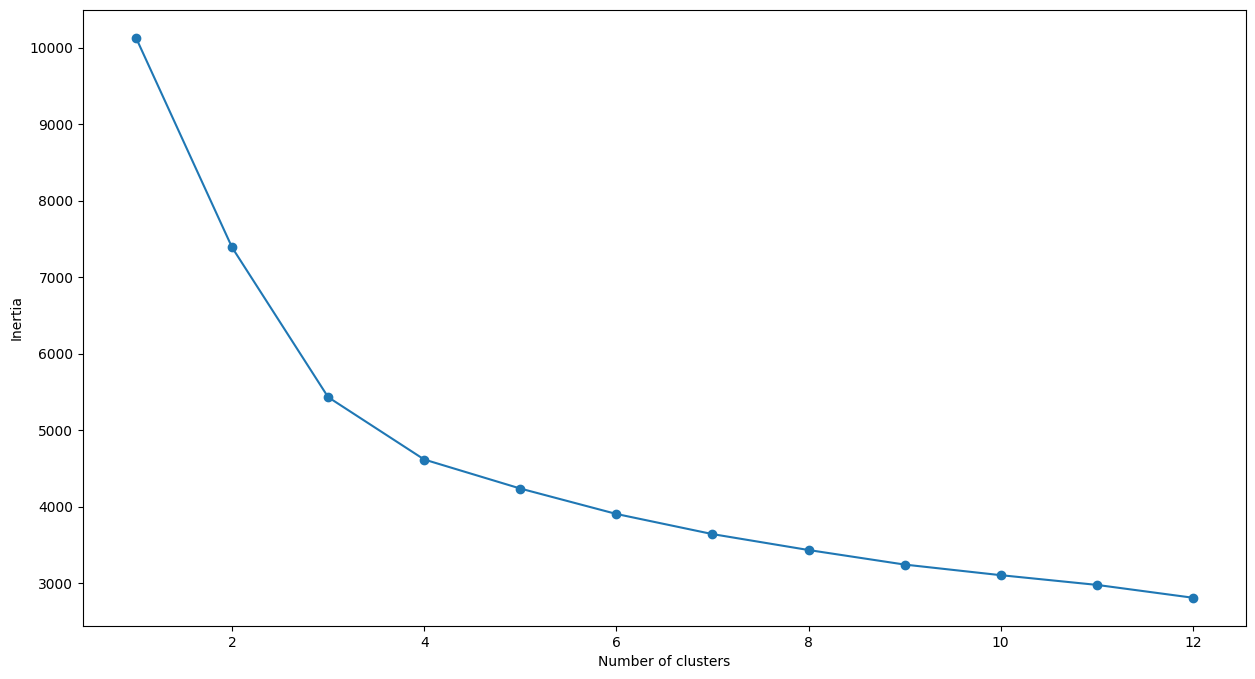

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
SSE = []
for i in range(1,13):
    kme = KMeans(n_clusters = i, init = "k-means++", n_init = 10)
    kme.fit(standf)
    SSE.append(kme.inertia_)
sse=pd.DataFrame({"cluster":range(1,13), "SSE":SSE})
plt.figure(figsize=(15,8))
plt.plot(sse["cluster"],sse["SSE"],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The elbow of the graph is at 3.
So we take 3 clusters in our K-Means algorithm

In [33]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, init="k-means++",n_init=10)
kmeans.fit(standf)
print(silhouette_score(standf, kmeans.labels_, metric="euclidean"))

0.3345787826028652


In [34]:
pred = kmeans.predict(standf)
frame = pd.DataFrame(new_df)
frame["cluster"] = pred

In [35]:
frame.head()

,Used,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,cluster
0,0,0,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,0
1,1,1,2500,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0
2,0,3,2500,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,1
3,0,1,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,0,1,2500,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,0


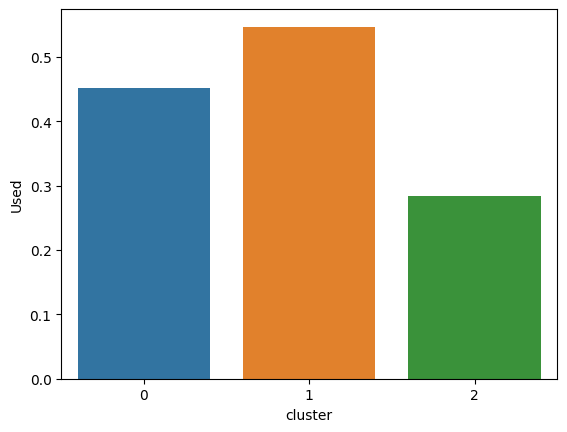

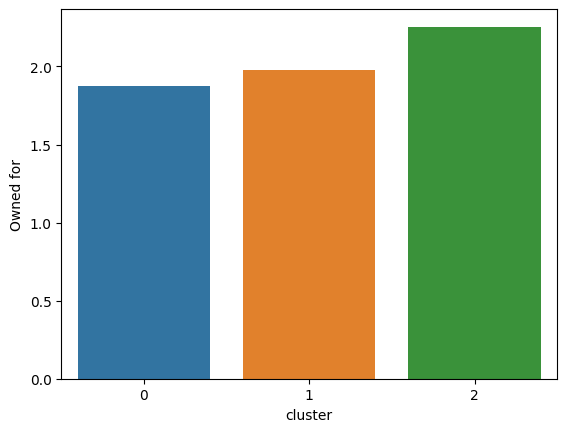

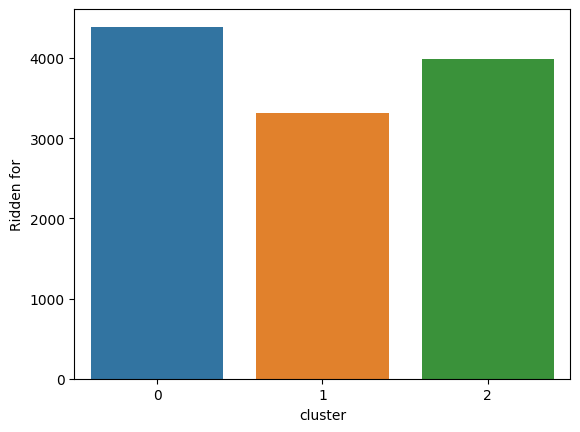

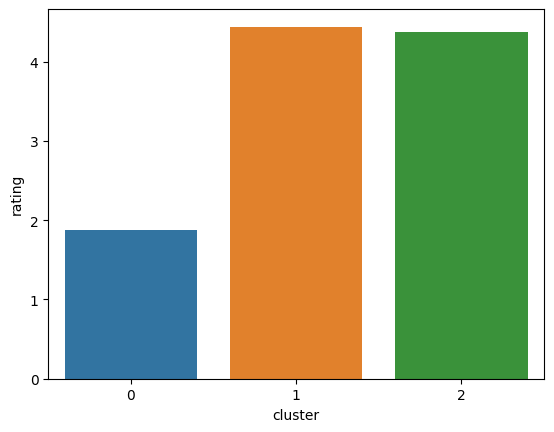

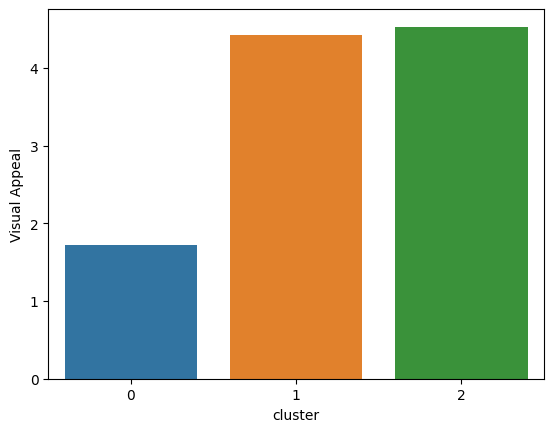

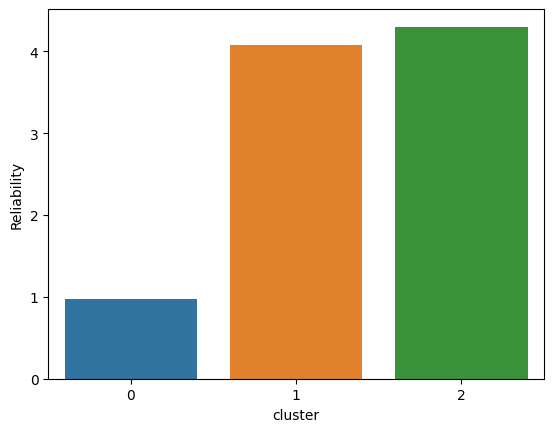

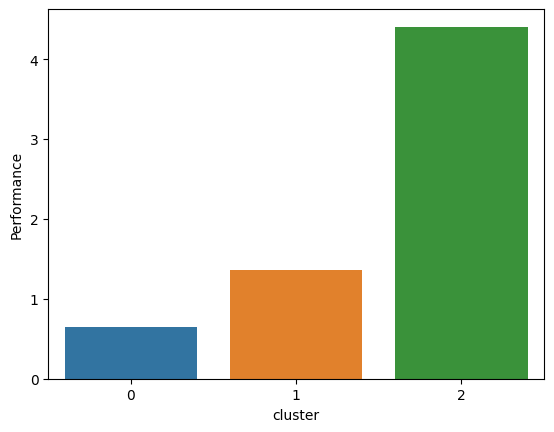

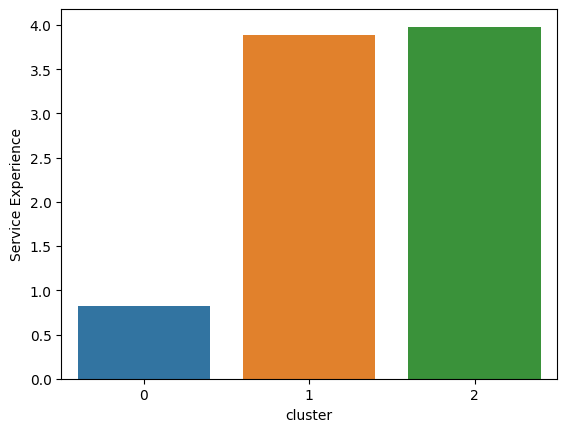

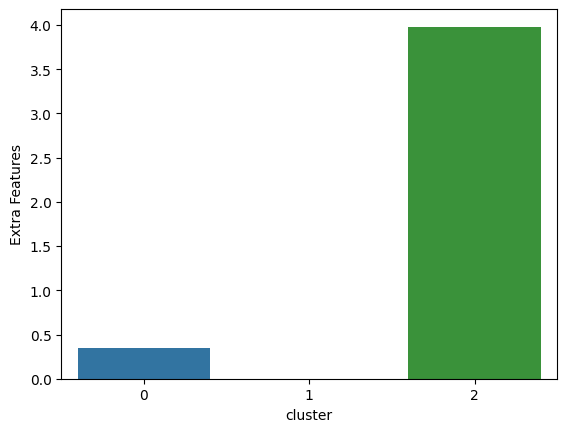

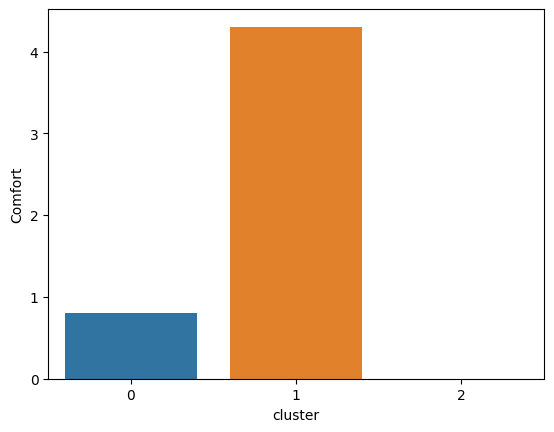

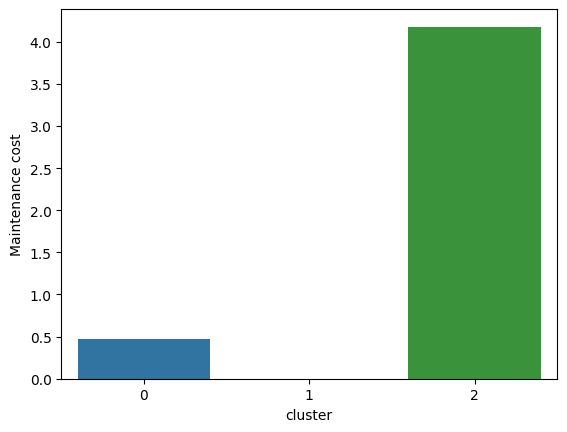

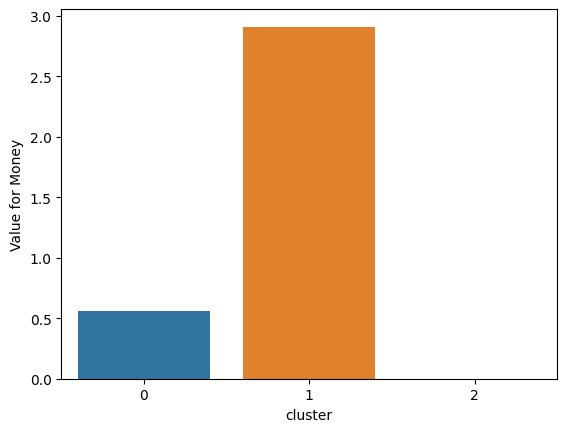

In [37]:
import seaborn as sns
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in column_names:
    sns.barplot(x='cluster', y= str(i), data=avg_df)
    plt.show()

# Results
We can see that customers in cluster 1 are most likely to purchase again as they are most likely to frequently purchase